[1.34975201 0.37396532]
-53.22380154780655
[22.0351946  0.0954915]
-11.715042243225394
[2.  0.5]
-35.26438968275464


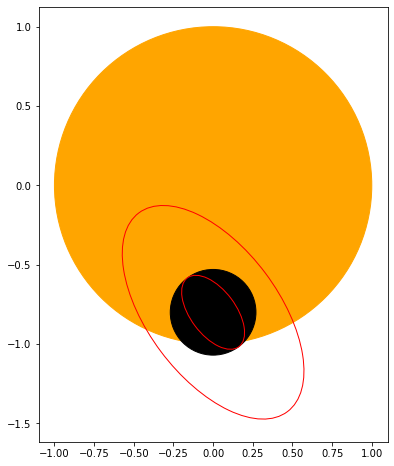

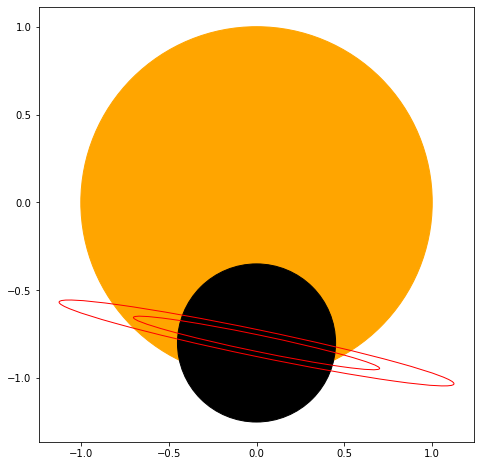

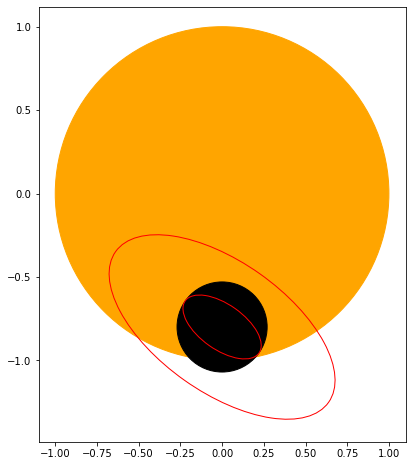

In [133]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


def plot_ring(rp_rs=0.1, rin_rp=1.3, rout_rin=2, b=0.8, theta=30 * 3.14/180.0, phi = 30 * 3.14/180.0):
    """
        plotter for rings
        
        Params:
            rp_rs (float): ratio of planetary raidus to stellar radius
            rp_rin (float):ratio of inner ring radius to planetary raidus
            rout_rin (float):ratio of outer ring radius to inner ring radius
            b (float):impact parameter
            theta (float): ring angle 1 (radian)
            phi (float): ring angle 2 (radian)
        Returns:
            None:
    """


    R_in = rp_rs * rin_rp
    R_out = rp_rs * rin_rp * rout_rin

    ## calculte of ellipse of rings
    a0 =1
    b0 = - np.sin(phi) /np.tan(theta)
    c0 = (np.sin(phi)**2)/(np.tan(theta)**2) + ((np.cos(phi)**2)/(np.sin(theta)**2))
    
    
    A = np.array([[a0, b0],[b0,c0]])
    u, s, vh = svd(A)
    angle = (np.arctan2(u[0][0], u[0][1]))*180/np.pi
    major = s[0]
    major_to_minor = np.sqrt((s[1]/s[0]))
    print(s)
    print(angle)

    fig = plt.figure(figsize = (8,8))
    ax = plt.axes()
    c = patches.Circle(xy=(0, 0), radius=1.0, fc='orange', ec='orange')
    c2 = patches.Circle(xy=(0, -b), radius=rp_rs, fc='k', ec='k')
    e = patches.Ellipse(xy=(0, -b), width=2 * R_in, height=2 * R_in * major_to_minor, angle = angle, fc='none', ec='r')
    e2 = patches.Ellipse(xy=(0, -b), width=2 * R_out, height=2 * R_out * major_to_minor, angle = angle, fc='none', ec='r')
    ax.add_patch(c)
    ax.add_patch(c2)
    ax.add_patch(e)
    ax.add_patch(e2)
    plt.axis('scaled')
    ax.set_aspect('equal')
    plt.savefig('./test.png')
    
plot_ring(rp_rs = 0.27, rin_rp = 1.003, rout_rin = 2.896/1.003, theta = 59.4 * np.pi/180.0, phi = 52.3* np.pi/180.0)
plot_ring(rp_rs = 0.45, rin_rp = 1.59, rout_rin = 2.55/1.59, theta = 12.3 * np.pi/180.0, phi = 72* np.pi/180.0)
plot_ring(rp_rs = 0.27, rin_rp = 1.003, rout_rin = 2.896/1.003, theta = 45 * np.pi/180.0, phi = 45* np.pi/180.0)

